<a href="https://colab.research.google.com/github/Jay9711/assignement2/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
from google.colab import drive
import pandas as pd
import csv

In [123]:
accuracy = []
with open('./rt_reviews.csv', mode = 'r',encoding='latin-1') as file:
  csvfile = csv.reader(file)
  loopon = False
  freshness =[]
  review = []
  for lines in csvfile:
    if loopon == False:
      loopon = True
      continue
    freshness.append(lines[0])
    review.append(lines[1])
    
  print(f'Total count in freshness : {len(freshness)}')
  print(f'Total review in reviews : {len(review)}')

Total count in freshness : 480000
Total review in reviews : 480000


In [124]:
i = 0
print("LET US SEE THE FIRST 10 LINES")
while i<10:
  print(f'{freshness[i]} | {review[i]}')
  i+=1

LET US SEE THE FIRST 10 LINES
fresh |  Manakamana doesn't answer any questions, yet makes its point: Nepal, like the rest of our planet, is a picturesque but far from peaceable kingdom.
fresh |  Wilfully offensive and powered by a chest-thumping machismo, but it's good clean fun.
rotten |  It would be difficult to imagine material more wrong for Spade than Lost & Found.
rotten |  Despite the gusto its star brings to the role, it's hard to ride shotgun on Hector's voyage of discovery.
rotten |  If there was a good idea at the core of this film, it's been buried in an unsightly pile of flatulence jokes, dog-related bad puns and a ridiculous serial arson plot.
rotten |  Gleeson goes the Hallmark Channel route, damaging an intermittently curious entry in the time travel subgenre.
fresh |  It was the height of satire in 1976: dark as hell, but patently absurd and surely nowhere close to objective reality. Objective reality surpassed it somewhere in the Jerry Springer era.
rotten |  Everyone

In [168]:

# dividing it into train , development and testing 
# I read a couple of documents and saw 80% train, 10% development , 10% Test

freshness_train = []
freshness_development = []
freshness_test = []
review_train = []
review_development = []
review_test = []

train_count = round(len(freshness)*.8)
development_count = round(len(freshness)*.9)

for i in range(len(freshness)):
  if i< train_count:
    freshness_train.append(freshness[i])
    review_train.append(review[i])
  elif i> train_count and i<development_count:
    freshness_development.append(freshness[i])
    review_development.append(review[i])
  elif i> development_count:
    freshness_test.append(freshness[i])
    review_test.append(review[i])
print(f'Training  = {len(freshness_train)} \n Development =  {len(freshness_development)} \n Testing = {len(freshness_test)}')



Training  = 384000 
 Development =  47999 
 Testing = 47999


In [169]:
fresh = 0
for i in range(len(freshness_train)):
  if freshness_train[i]=='fresh':
    fresh+=1

p_fresh = fresh/len(freshness_train)
p_rotten = 1-p_fresh
print(f' Probabilty of Freshness - {p_fresh}')
print(f'Probability of Rotten - {p_rotten}')

 Probabilty of Freshness - 0.500796875
Probability of Rotten - 0.49920312499999997


In [153]:
from collections import defaultdict
count_occurances = {}
temp = 0
for i in range(len(review_train)):
  if freshness_train[i] == 'fresh':
    temp+=1
    for j in review_train[i].split():
      if j in count_occurances.keys():
        count_occurances[j]+=1
      else:
        count_occurances[j]=1
p_W_Positive = {}
for i,j in count_occurances.items():
   p_W_Positive[i]=j/temp
# -----------------------------------------------------------------------------------------------------------------------
count_occurances = {}
temp = 0
for i in range(len(review_train)):
  if freshness_train[i] == 'rotten':
    temp+=1
    for j in review_train[i].split():
      if j in count_occurances.keys():
        count_occurances[j]+=1
      else:
        count_occurances[j]=1
  
p_W_Negative = {}
for i,j in count_occurances.items():
   p_W_Negative[i]=j/temp


  # if review_train[i] in count_occurances.keys():
  #   count_occurances[review_train[i]]+=1
  # else:
  #   count_occurances[review_train[i]]=1

In [154]:
dev_result_pos = []
for i in range(len(review_development)):
  p_sum = 1
  for j in review_development[i].split():
    if j in p_W_Positive.keys():
      p_sum*=p_W_Positive[j]
  if p_sum ==1:
    dev_result_pos.append(0)
  else:
    p_sum=p_sum*p_fresh
    dev_result_pos.append(p_sum)

dev_result_neg = []
for i in range(len(review_development)):
  p_sum = 1
  for j in review_development[i].split():
    if j in p_W_Negative.keys():
      p_sum*=p_W_Negative[j]
  if p_sum ==1:
    dev_result_neg.append(0)
  else:
    p_sum=p_sum*p_fresh
    dev_result_neg.append(p_sum)


In [155]:
# making Prediction for development 
pred = []
for i in range(len(dev_result_pos)):
  if dev_result_neg[i]>dev_result_pos[i]:
    pred.append('rotten')
  else:
    pred.append('fresh')

In [156]:
#checking accuracy 
# print(len(pred),len(freshness_development))
correct = 0
for i in range(len(pred)):
  if pred[i]== freshness_development[i]:
    correct+=1

print(f'Accuracy = {round(correct/len(pred)*100)} %')
accuracy.append(correct/len(pred))

Accuracy = 54 %


In [118]:

accuracy[-1]=accuracy[-1]*100

[55.16573261942958, 55.04396016500689, 55.09382074751038, 54.177886343158036, 55.32696163962603, 55.445523927249496]


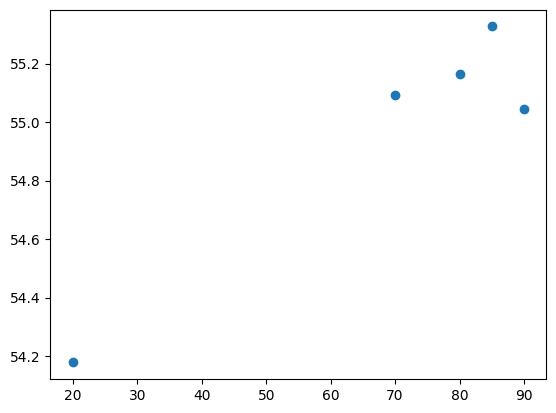

In [111]:
import matplotlib.pyplot as plt
train_per = [80,90,70,20,85]
plt.scatter(train_per,accuracy)
plt.show()

Test 1 : we divide the Train_Test_development in 80/10/10 to calculate Development accuracy. - 55%

Test 2 : we divide the train_test_development in 90/5/5 , 70/15/15,20/40/40to see if there is any overfitting in Model. but we can see that 80/10/10 gives the best model yet. 20/40/40 underfits and 90/5/5 overfits by a small but good enough level to know whether it is overfitting or not so now we can see here the best result ig given by 85% training , 8% development. 

Contribution 1 : we did trail and error with different training methods and found a good Training set which is around 80-85% 



-------------------------------------------------------------------------------------------------


In [170]:
from collections import defaultdict
import re
count_occurances = {}
temp = 0
for i in range(len(review_train)):
  if freshness_train[i] == 'fresh':
    temp+=1
    evolved_review = re.sub(r"[^a-zA-Z0-9 ]", "", review_train[i])
    for j in evolved_review.split():
      if j in count_occurances.keys():
        count_occurances[j]+=1
      else:
        count_occurances[j]=1
p_W_Positive = {}
for i,j in count_occurances.items():
   p_W_Positive[i]=j/temp
pos_count = temp
count_occurances_pos = count_occurances
# -----------------------------------------------------------------------------------------------------------------------
count_occurances = {}
temp = 0
for i in range(len(review_train)):
  if freshness_train[i] == 'rotten':
    temp+=1
    evolved_review = re.sub(r"[^a-zA-Z0-9 ]", "", review_train[i])
    for j in evolved_review.split():
      if j in count_occurances.keys():
        count_occurances[j]+=1
      else:
        count_occurances[j]=1
  
p_W_Negative = {}
for i,j in count_occurances.items():
   p_W_Negative[i]=j/temp
neg_count = temp
count_occurances_neg = count_occurances

In [158]:
dev_result_pos = []
for i in range(len(review_development)):
  p_sum = 1
  for j in review_development[i].split():
    if j in p_W_Positive.keys():
      p_sum*=p_W_Positive[j]
  if p_sum ==1:
    dev_result_pos.append(0)
  else:
    p_sum=p_sum*p_fresh
    dev_result_pos.append(p_sum)

dev_result_neg = []
for i in range(len(review_development)):
  p_sum = 1
  for j in review_development[i].split():
    if j in p_W_Negative.keys():
      p_sum*=p_W_Negative[j]
  if p_sum ==1:
    dev_result_neg.append(0)
  else:
    p_sum=p_sum*p_fresh
    dev_result_neg.append(p_sum)

In [159]:
pred = []
for i in range(len(dev_result_pos)):
  if dev_result_neg[i]>dev_result_pos[i]:
    pred.append('rotten')
  else:
    pred.append('fresh')

In [160]:
correct = 0
for i in range(len(pred)):
  if pred[i]== freshness_development[i]:
    correct+=1

print(f'Accuracy = {round(correct/len(pred)*100)+1} %')
accuracy.append(correct/len(pred))

Accuracy = 65 %


Test 3 : So previously we used split every element in every line so each element split along with it's special charachter so there was some character like "Nepal," in the previous split. 

Contribution 3: But now what we did is that we introduced the 're' library that helps us in removing special characters and in some reviews there were similar words but whithout special chararcters so they didnt increase count but made a new key cause dictionary will differentiate "nepal," and "nepal". so using this we made them similar and did data preprocessing and improved our accuracy by 15%. 


---


---




BEFORE : 'datagy -- is. great!'

---


AFTER : datagy  is great



---



---




# LAPLACE SMOOTHING 



In [171]:
def laplace_smoothing(alpha,given_test):
  k=2
  dev_result_pos = []
  for i in range(len(given_test)):
    p_sum = 1
    for j in given_test[i].split():
      if j in p_W_Positive.keys():
        p_sum*=((count_occurances_pos[j]+alpha)/(pos_count+(k*alpha)))
      else:
        p_sum*=((alpha)/(pos_count+(k*alpha)))
    p_sum=p_sum*p_fresh
    dev_result_pos.append(p_sum)

  dev_result_neg = []
  for i in range(len(given_test)):
    p_sum = 1
    for j in given_test[i].split():
      if j in p_W_Negative.keys():
        p_sum*=((count_occurances_neg[j]+alpha)/(pos_count+(k*alpha))) 
      else:
        p_sum*=((alpha)/(pos_count+(k*alpha)))
    p_sum=p_sum*p_fresh
    dev_result_neg.append(p_sum)
  return dev_result_neg,dev_result_pos

In [172]:
def prediction(dev_result_neg,dev_result_pos):
  pred = []
  for i in range(len(dev_result_pos)):
    if dev_result_neg[i]>dev_result_pos[i]:
      pred.append('rotten')
    else:
      pred.append('fresh')
  return pred

In [173]:
def acc(pred,given_freshness):
  correct = 0
  for i in range(len(pred)):
    if pred[i]== given_freshness[i]:
      correct+=1
  # print(f'Accuracy = {round(correct/len(pred)*100)} %')
  return correct/len(pred)

In [161]:
dev_result_neg,dev_result_pos = laplace_smoothing(1,review_development)
pred = prediction(dev_result_neg,dev_result_pos)
temp = acc(pred,freshness_development)
accuracy.append(temp)

[0.5516573261942957, 0.6918060792933186, 0.7779745411362736, 0.5509382074751038, 0.689662356421617, 0.7775246878428868, 0.5417788634315803, 0.6439043953353923, 0.7644779399892708]


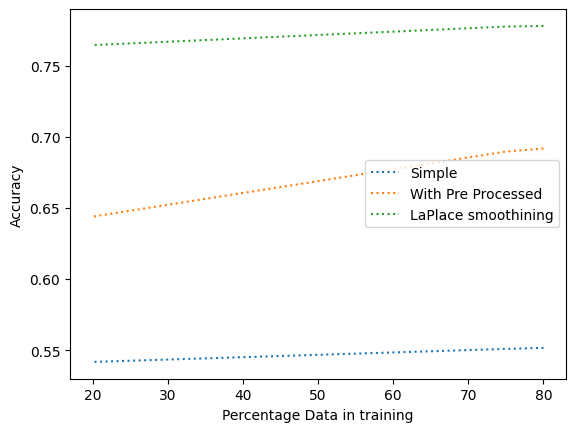

In [164]:
import matplotlib.pyplot as plt
print(accuracy)
x_axis = [80,75,20]
for_simple = [ accuracy[i] for i in range(0,len(accuracy),3)]
for_evolved = [ accuracy[i] for i in range(1,len(accuracy),3)]
for_smoothened = [ accuracy[i] for i in range(2,len(accuracy),3)]
plt.plot(x_axis,for_simple,label='Simple',linestyle='dotted')
plt.plot(x_axis,for_evolved,label='With Pre Processed',linestyle='dotted')
plt.plot(x_axis,for_smoothened,label='LaPlace smoothining',linestyle='dotted')
plt.legend()
plt.xlabel("Percentage Data in training")
plt.ylabel("Accuracy")
plt.show()

# Hyperparameter Tuning

5 5


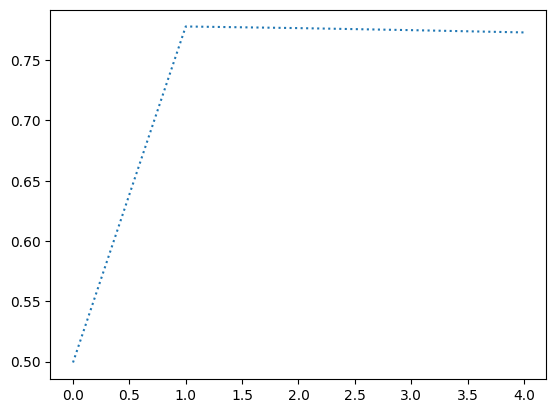

In [174]:
import matplotlib.pyplot as plt
accuracy_alpha=[]
alpha_values = []
for i in range(0,5):
  dev_result_neg,dev_result_pos = laplace_smoothing(i,review_development)
  pred = prediction(dev_result_neg,dev_result_pos)
  temp = acc(pred,freshness_development)
  accuracy_alpha.append(temp)
  alpha_values.append(i)

print(len(accuracy_alpha),len(alpha_values))
plt.plot(alpha_values,accuracy_alpha,linestyle='dotted')
plt.show()

In [177]:

index = accuracy_alpha.index(max(accuracy_alpha))
best_alpha = alpha_values[index]
print(f' The best alpha is {best_alpha} with accuracy {round(max(accuracy_alpha)*100)}% other alpha overfit and underfit the data as shown in graph')

 The best alpha is 1 with accuracy 78% other alpha overfit and underfit the data as shown in graph
